In [1]:
import os
import json
runs = os.listdir("results_vsf")

In [2]:
vsf_scores = []
for i in runs: 
    with open(f"results_vsf/{i}/vqa.json", "r") as f: 
        data = json.load(f)
        pos_score = sum([i['ans'][0] for i in data])
        neg_score = sum([i['ans'][1] for i in data])
        qua_score = sum([i['ans'][2] for i in data])
        vsf_scores.append([pos_score, neg_score, qua_score])
print(len(runs))
runs = os.listdir("results_nag")
nag_scores = []
for i in runs:
    with open(f"results_nag/{i}/vqa.json", "r") as f:
        data = json.load(f)
        pos_score = sum([i['ans'][0] for i in data])
        neg_score = sum([i['ans'][1] for i in data])
        qua_score = sum([i['ans'][2] for i in data])
        nag_scores.append([pos_score, neg_score, qua_score])
print(len(runs))


32
286


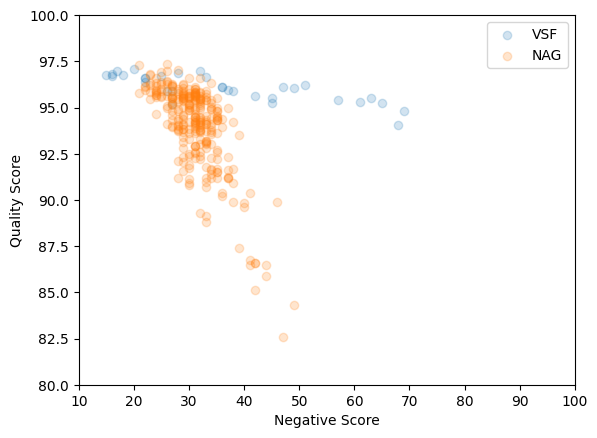

In [19]:
import pylab
import numpy as np 
vsf_scores = np.array(vsf_scores)
pylab.scatter(vsf_scores[:,1], vsf_scores[:,2], alpha=0.2, label='VSF')
nag_scores = np.array(nag_scores)
pylab.scatter(nag_scores[:,1], nag_scores[:,2], alpha=0.2, label='NAG')
pylab.xlim(10, 100) 
pylab.ylim(80, 100)
pylab.xlabel("Negative Score")
pylab.ylabel("Quality Score")
pylab.legend()

Text(0, 0.5, 'Positive Score')

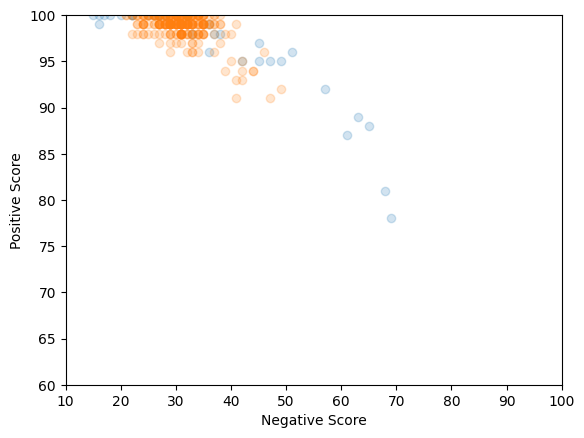

In [17]:
import pylab
import numpy as np 
vsf_scores = np.array(vsf_scores)
pylab.scatter(vsf_scores[:,1], vsf_scores[:,0], alpha=0.2)
nag_scores = np.array(nag_scores)
pylab.scatter(nag_scores[:,1], nag_scores[:,0], alpha=0.2)
pylab.xlim(10, 100) 
pylab.ylim(60, 100)
pylab.xlabel("Negative Score") 
pylab.ylabel("Positive Score")

In [ ]:
# scale it same range as pos score

In [ ]:
index = np.argmax(nag_scores[:,1] + nag_scores[:,0] * 0.25 +nag_scores[:,2] * 0.25, axis=0)
runs = os.listdir("results_nag")
print("Best NAG run:", runs[index])
print(nag_scores[index])
print("Total Score:", nag_scores[index][0] + nag_scores[index][1] * 0.25 + nag_scores[index][2] * 0.25)
print("normed quality score:", (nag_scores[index][2] - quality_mean) / quality_std)
# nag_alpha:0.963854710160938
# nag_scale:11.396780194310066
# nag_tau:7.933687913292021

Best NAG run: rf1xtzyx
[92.  49.  84.3]
Total Score: 125.32499999999997
normed quality score: -1.7199979830949896


In [9]:
index = np.argmax(vsf_scores[:,1] + vsf_scores[:,0] * 0.25 +vsf_scores[:,2] * 0.25, axis=0)
runs = os.listdir("results_vsf")
print("Best VSF run:", runs[index])
print(vsf_scores[index])
print("Total Score:", vsf_scores[index][0] + vsf_scores[index][1] * 0.25 + vsf_scores[index][2] * 0.25)
print("normed quality score:", (vsf_scores[index][2] - quality_mean) / quality_std)
# offset:0.050543996249802825
# scale:4.983785604546293

Best VSF run: ntruzeez
[78.  69.  94.8]
Total Score: 118.95
normed quality score: 0.15305886851179623
